In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(123475328)

In [2]:
df = pd.read_csv("iris.csv",index_col=False)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df['species'] = df['species'].replace(['setosa', 'versicolor', 'virginica'],[0,1,2])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


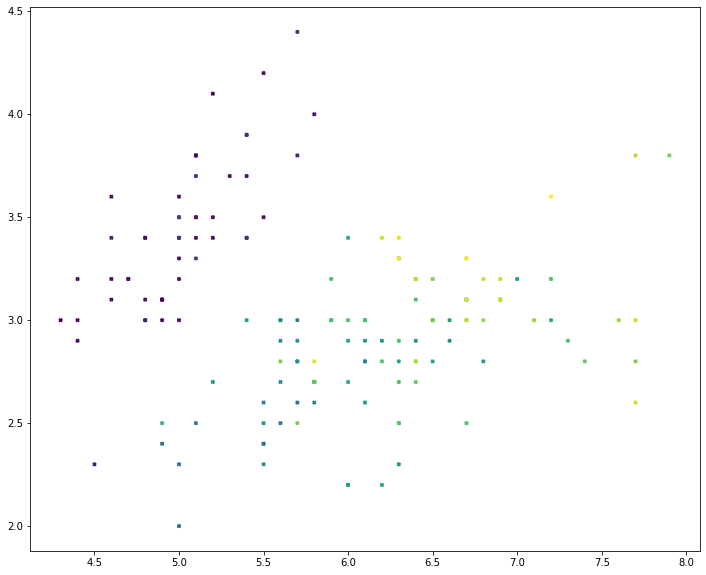

In [6]:
x = df.drop(['species'],axis=1)
y = df['species']
fig = plt.figure() 
fig.set_size_inches(12,10)
plt.scatter(x['sepal_length'],x['sepal_width'],x['petal_length'],x['petal_width'],marker= "X",sizes = [10])
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.9)

## Initialing the centroid with best X_train example to fit the centroid

In [8]:
x_t = np.asarray(X_train)
x_test = np.asarray(X_test)
x_t.shape

(135, 4)

In [9]:
no_of_clusters=3
J=200.0
for i in range(10000):
    k= np.array([])
    a= np.random.randint(low= x_t.shape[0],size=no_of_clusters)
    for j in a: 
        b = np.reshape(x_t[j,:],(1,x_t[j,:].shape[0]))
        k = np.append(k,b)
    k = np.reshape(k , (no_of_clusters,x_t[j,:].shape[0]))
    c=0
    for a1 in range(x_t.shape[0]):
        l1=[]
        for b1 in range(no_of_clusters):
            l1.append(np.square(np.sum(x_t[a1][:]-k[b1][:])))   
        c= c+min(l1)   
#     c=np.sum((np.minimum(np.square(x_t-k[0][:]) ,np.square(x_t-k[1][:]),np.square(x_t-k[2][:]))))
    if( c < J):
        J = c
        k_final = k
        print(k_final,J)
   

[[5.1 3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.6 3.  4.1 1.3]] 154.22999999999993
[[6.7 3.1 5.6 2.4]
 [5.1 3.7 1.5 0.4]
 [5.4 3.  4.5 1.5]] 140.88999999999993
[[5.2 3.5 1.5 0.2]
 [6.8 3.  5.5 2.1]
 [5.7 2.8 4.5 1.3]] 136.10000000000002
[[4.8 3.4 1.9 0.2]
 [5.9 3.  4.2 1.5]
 [7.1 3.  5.9 2.1]] 130.07999999999996
[[4.8 3.4 1.9 0.2]
 [6.  2.2 5.  1.5]
 [6.5 3.  5.8 2.2]] 127.87999999999991
[[6.2 2.9 4.3 1.3]
 [6.7 3.1 5.6 2.4]
 [4.8 3.4 1.9 0.2]] 125.98999999999991


##  Creating  the training loop after K_means centroids 

In [10]:
epoch =1000
for i in range(epoch):
#     assiginig points to cluster centroids
    d=[]
    for j in range(x_t.shape[0]):
        a=np.square(np.sum(x_t[j][:]-k[0][:]))
        b=np.square(np.sum(x_t[j][:]-k[1][:]))
        c=np.square(np.sum(x_t[j][:]-k[2][:]))
        d.append(np.argmin([a,b,c]))
    
    d = np.asarray(d)
    d=  np.reshape(d,(len(d),1))
    
    x_t = np.append(x_t,d,axis=1)
                             
#     move the cluster centroid
    k2= np.array([])
    for n in range(no_of_clusters):
        a1 = x_t[np.where(x_t[:,-1]==n)]
        mean=np.sum(a1[:,:-1],axis=0)/a1.shape[0]
        mean = np.reshape(mean,(1,mean.shape[0]))
        # print(mean.shape)
        k2 = np.append(k2,mean)
        # print(k2.shape)
    x_t = np.delete(x_t,-1,1)
    k2 = np.reshape(k2 , (no_of_clusters,x_t[j,:].shape[0]))
    k=k2
    # print(k)
    
        

In [11]:
K_centroid = k
np.savetxt("centroid.txt", K_centroid, delimiter =", ")

## Got the Centroid value in k

In [12]:
e=[]
for j in range(x_t.shape[0]):
        a1=np.square(np.sum(x_t[j][:]-k[0][:]))
        b1=np.square(np.sum(x_t[j][:]-k[1][:]))
        c1=np.square(np.sum(x_t[j][:]-k[2][:]))
        e.append(np.argmin([a1,b1,c1]))

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,e)

0.837037037037037

In [14]:
e=[]
for j in range(x_test.shape[0]):
        a1=np.square(np.sum(x_test[j][:]-k[0][:]))
        b1=np.square(np.sum(x_test[j][:]-k[1][:]))
        c1=np.square(np.sum(x_test[j][:]-k[2][:]))
        e.append(np.argmin([a1,b1,c1]))
accuracy_score(y_test,e)       

1.0

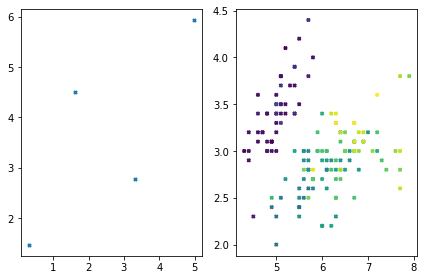

<Figure size 3456x3456 with 0 Axes>

In [15]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
# fig = plt.figure() 
# fig.set_size_inches(12,10)
plt.scatter(k[0][:],k[1][:],k[2][:],marker= "X",sizes = [10])


plt.subplot(1, 2, 2) # index 2
# fig = plt.figure() 
# fig.set_size_inches(12,10)
plt.scatter(x['sepal_length'],x['sepal_width'],x['petal_length'],x['petal_width'],marker= "X",sizes = [10])

plt.tight_layout()
plt.figure(figsize = (48, 48))
plt.show()